# Decision Trees and Random Forests in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# create a small subset
df = titanic[['survived', 'sex', 'sibsp', 'fare']]
df['survived'] = df['survived'].apply(lambda x: 'live' if x == 0 else 'die')
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df.head()

,survived,sex,sibsp,fare
0,live,1,1,7.2500
1,die,0,1,71.2833
2,die,0,0,7.9250
3,die,0,1,53.1000
4,live,1,0,8.0500


# EDA

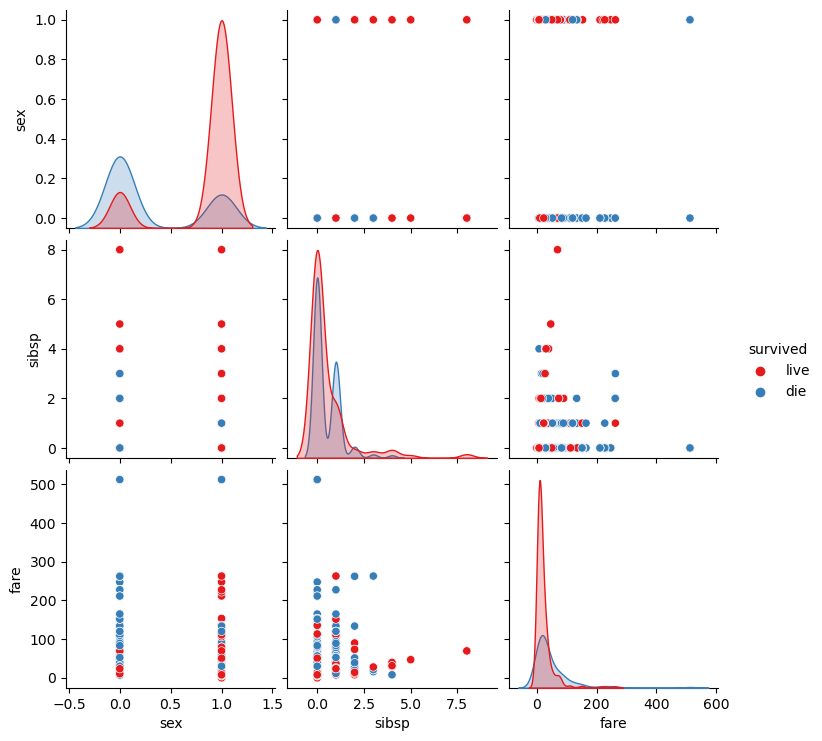

In [4]:
sns.pairplot(df, hue='survived', palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = df.drop('survived', axis=1).columns
features

Index(['sex', 'sibsp', 'fare'], dtype='object')

In [7]:
X = df.drop('survived', axis=1)
y = df['survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
type(y_train)

pandas.core.series.Series

In [11]:
X_train

,sex,sibsp,fare
522,1,0,7.2250
23,1,0,35.5000
320,1,0,7.2500
832,1,0,7.2292
430,1,0,26.5500
...,...,...,...
855,0,0,9.3500
217,1,1,27.0000
764,1,0,7.7750
99,1,1,26.0000


In [12]:
y_train

522    live
23      die
320    live
832    live
430     die
       ... 
855     die
217    live
764    live
99     live
234    live
Name: survived, Length: 623, dtype: object

## Decision Trees

We'll start just by training a single decision tree.

In [13]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model1.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[ 69  35]
 [ 28 136]]
              precision    recall  f1-score   support

         die       0.71      0.66      0.69       104
        live       0.80      0.83      0.81       164

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

0.7649253731343284


Pretty Good Result for a simple model!

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

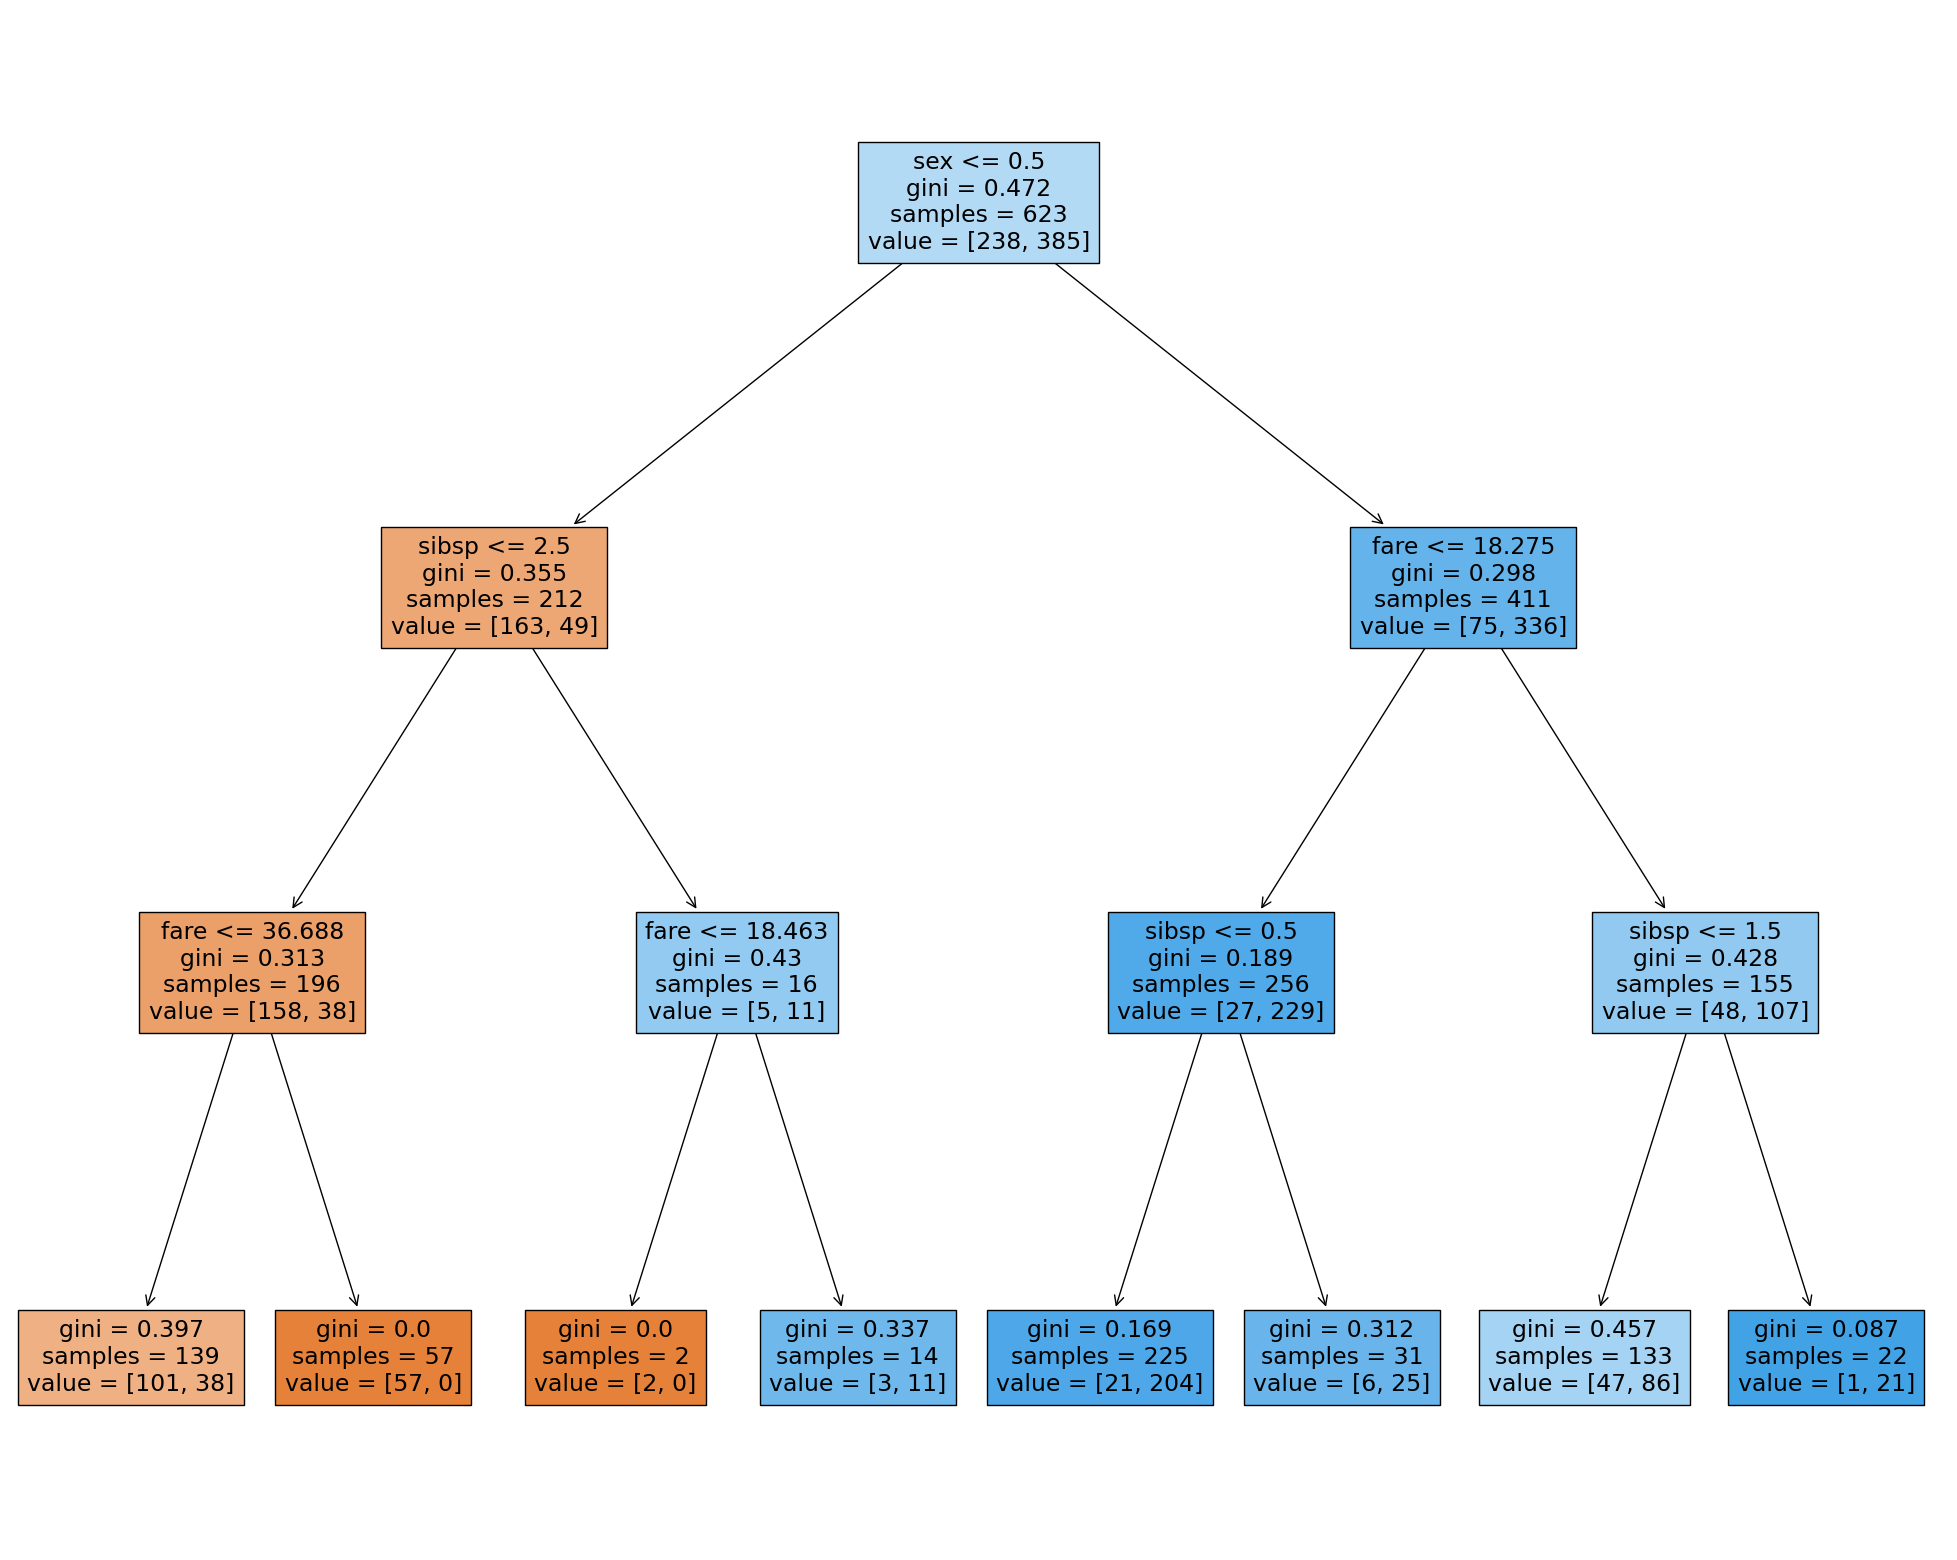

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model1, feature_names=features, filled=True)

### Now change the various model parameters (max_depth, criterion)

In [37]:
model2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 71  34]
 [ 25 138]]
              precision    recall  f1-score   support

         die       0.74      0.68      0.71       105
        live       0.80      0.85      0.82       163

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

0.7798507462686567


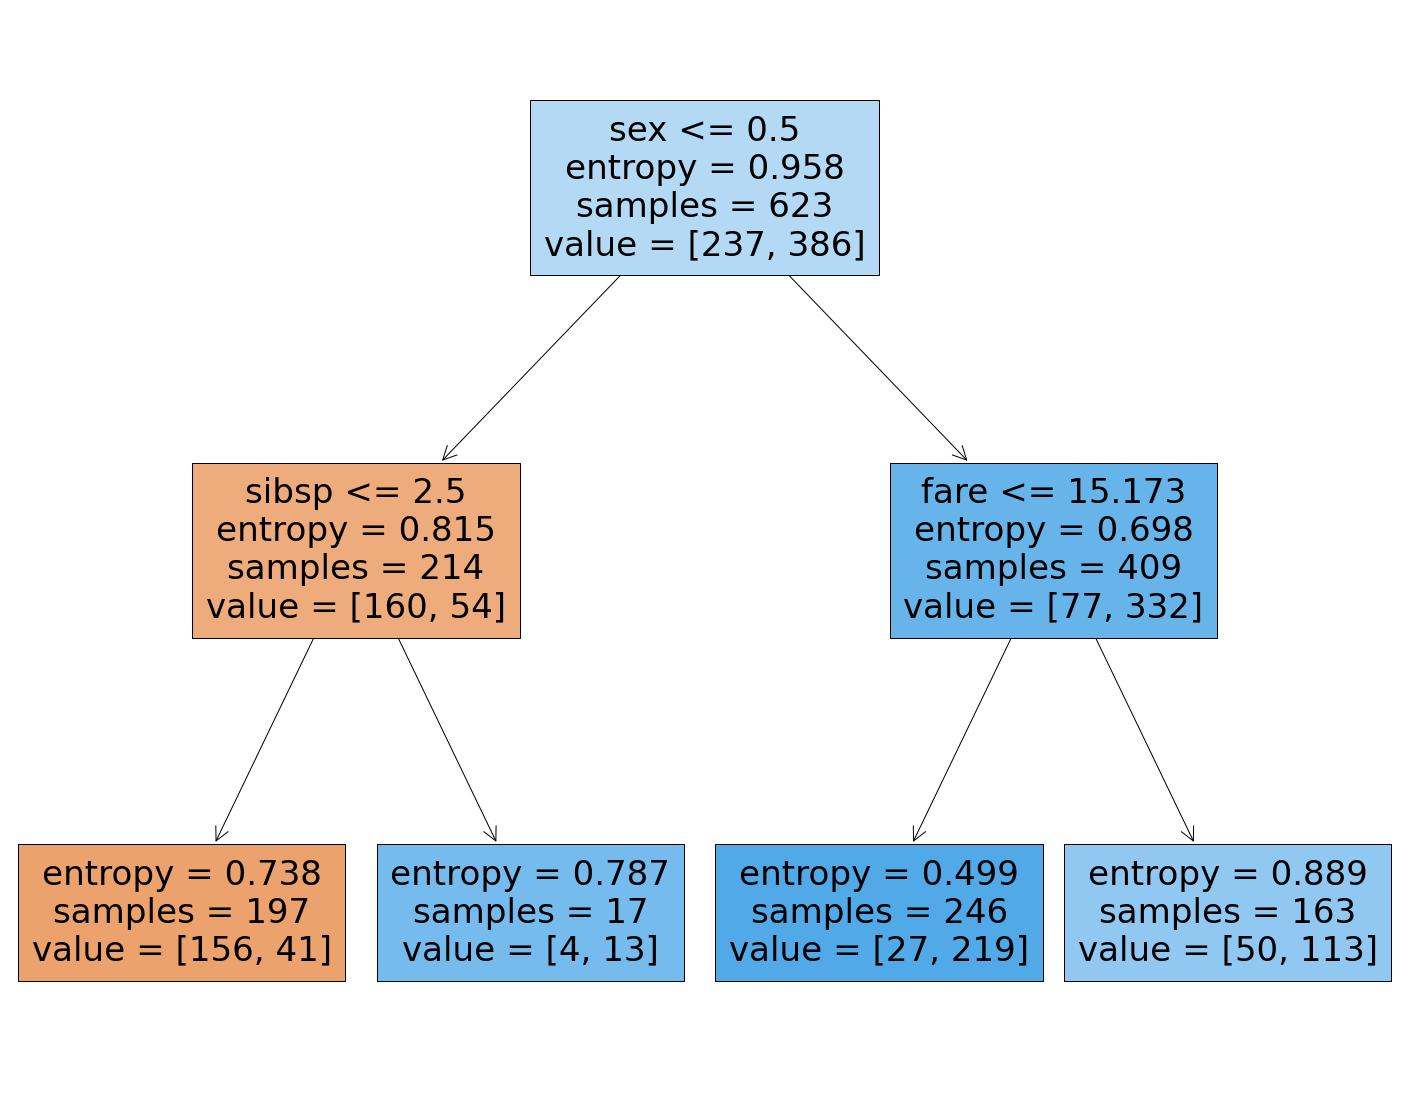

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, feature_names = features, filled=True)

In [39]:
model3 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 71  34]
 [ 25 138]]
              precision    recall  f1-score   support

         die       0.74      0.68      0.71       105
        live       0.80      0.85      0.82       163

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

0.7798507462686567


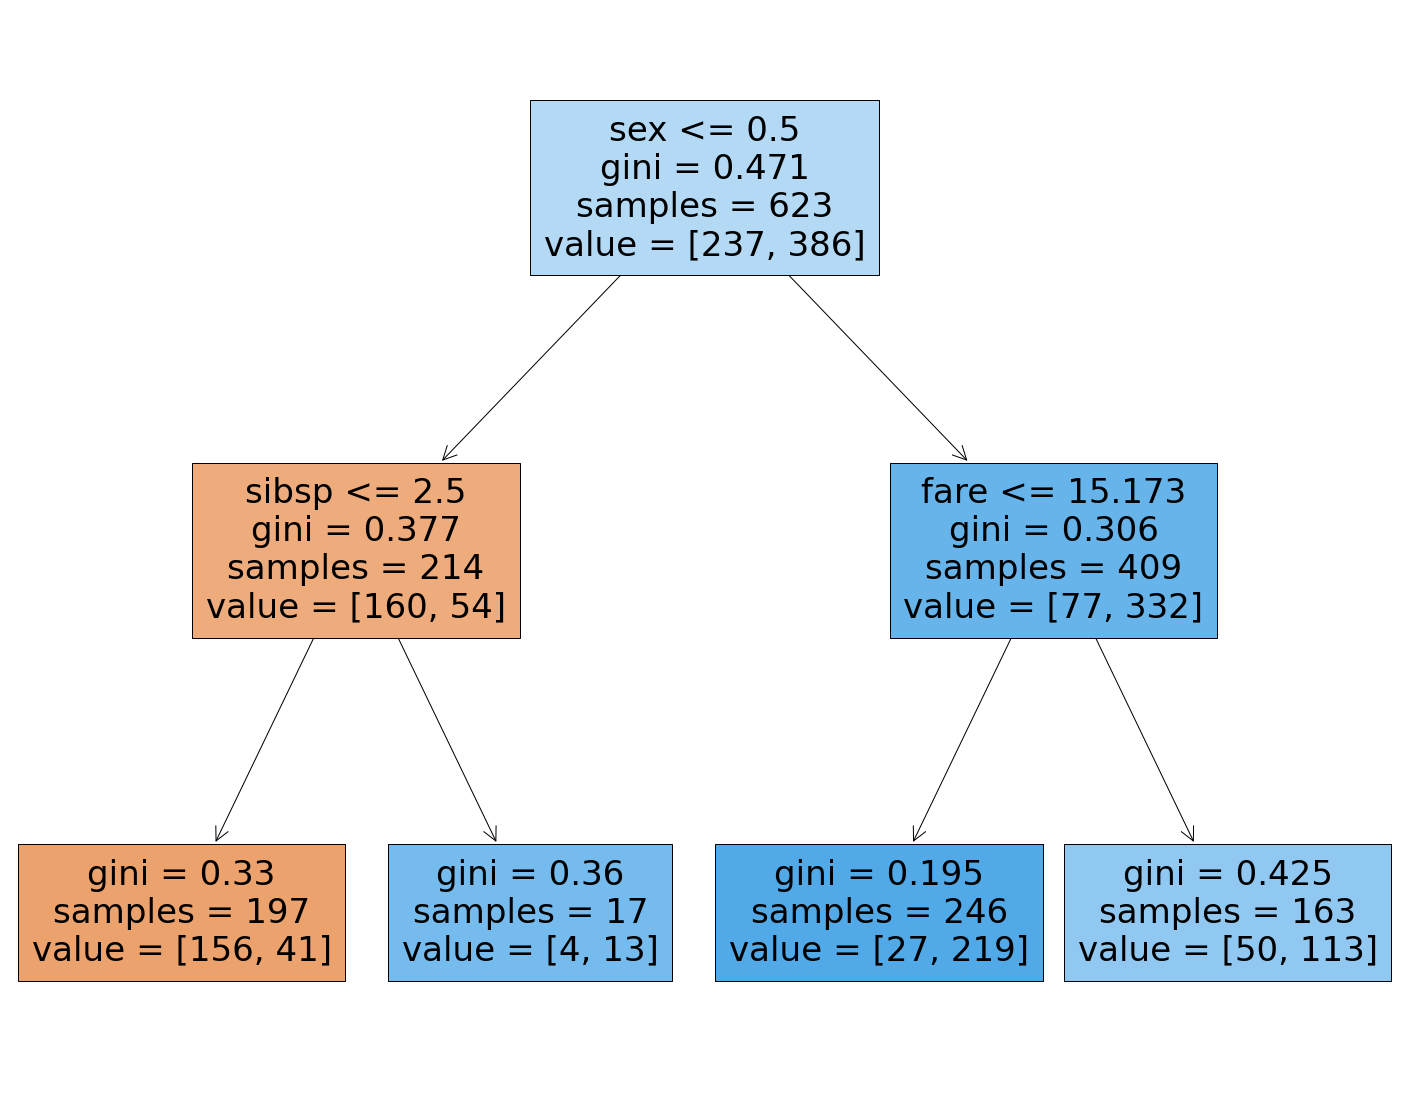

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model3, feature_names = features, filled=True)

[[ 71  34]
 [ 25 138]]
              precision    recall  f1-score   support

         die       0.74      0.68      0.71       105
        live       0.80      0.85      0.82       163

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

0.7798507462686567


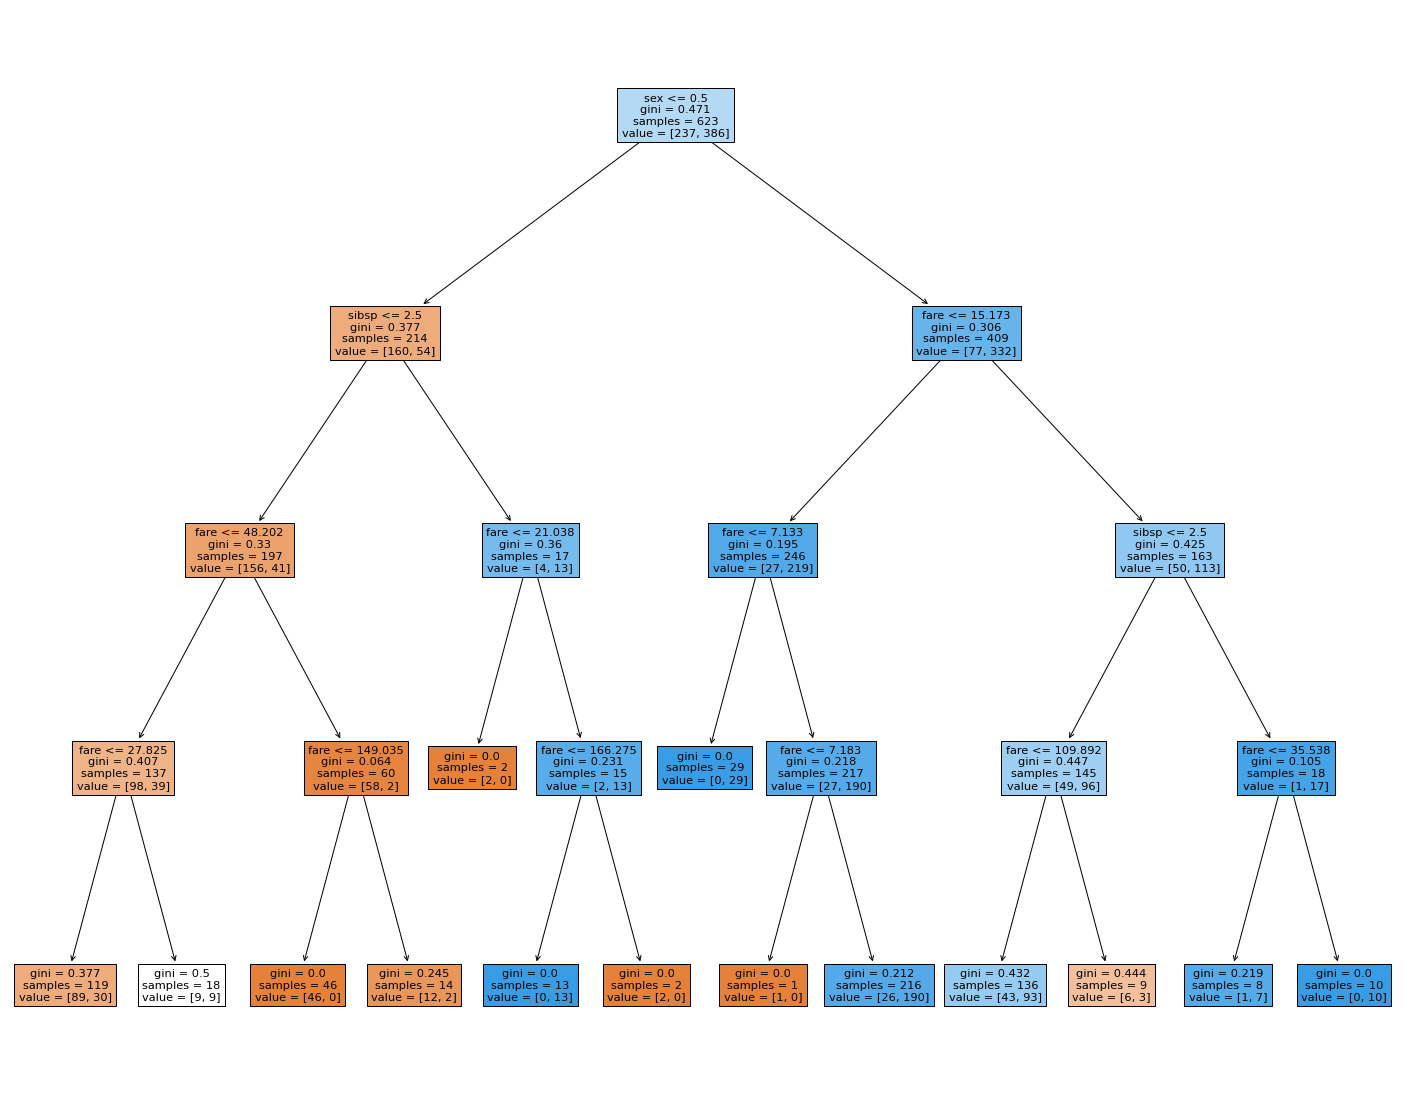

In [41]:
model4 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model4.fit(X_train, y_train)
predictions = model3.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model4, feature_names = features, filled=True)

***Deeper depth may not help***

# Random Forests

## Now let's compare the decision tree model to a random forest.

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

         die       0.69      0.64      0.66       105
        live       0.78      0.82      0.80       163

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.75      0.74       268

0.746268656716418


### Questions to you: will adding categorical variables help?